# Практическая работа №5: Элементы регрессионного анализа. Выборочные прямые среднеквадратической регрессии. Корреляционные отношения

Выполнила студентка гр. 1384 Шиняева Анастасия. Вариант №4

## Цель работы

Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК оценок, с понятием функции регрессии и роли МНК-в регрессионном анализе, с корреляционным отношением, как мерой тесноты произвольной (в том числе и линейной) корреляционной связи.

## Основные теоретические положения

**Метод наименьших квадратов (МНК)** - метод, основанный на поиске минимума суммы квадратов отклонений значений некоторых функций от заданного множества значений.

**Выборочные прямые среднеквадратической регрессии:**

$$ \overline{y}_x = \overline{y}_\theta + r_{xy} \frac{S_y}{S_x} (x - \overline{x}_\theta) $$

$$ \overline{x}_y = \overline{x}_\theta + r_{xy} \frac{S_x}{S_y} (y - \overline{y}_\theta) $$

Для оценки корреляционной зависимости между случайными величинами в общем случае, а не только для линейной зависимости, может быть использовано так называемое **корреляционное отношение**.

**Выборочное корреляционное отношение:**

$$ \bar{\eta}_{xy} = \frac{\bar{\sigma}_{\bar{x}_y}}{\bar{\sigma}_x} $$

где $ \bar{\sigma}_{\bar{x}_y} = \sqrt{D_{\text{межгр}}} $ ; $ \bar{\sigma}_x = \sqrt{D_{\text{общ}}} $ — выборочные значения СКВО $ \bar{x}_y $ и $ X $ соответственно.  

$$ \bar{\eta}_{yx} = \frac{\bar{\sigma}_{\bar{y}_x}}{\bar{\sigma}_y} $$

$ η_{xy} ⩾ |r_{xy}| $

$ η_{yx} ⩾ |r_{xy}| $

## Постановка задачи

Для заданной двумерной выборки $(X,Y)$ построить уравнения выборочных прямых среднеквадратической регрессии. Полученные линейные функции регрессии отобразить графически. Найти выборочное корреляционное отношение. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Перенесем необходимые данные из первых практических работ для выполнения текущей.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/data.csv', header=None, names=['nu', 'E']) # Выборка

ranked_data_E = data['E'].sort_values() # Ранжированный ряд

min_value_E = data['E'].min() # Минимальное значение
max_value_E = data['E'].max() # Максимальное значение

bin_edges_E = 7 # Количество интервалов
h_E = (max_value_E - min_value_E) / bin_edges_E # Ширина интервала

intervals_E = [min_value_E + i * h_E for i in range(bin_edges_E + 1)] # Границы интервала

absolute_freq, bin_edges_E = np.histogram(data['E'], bins=bin_edges_E) # Абсолютная частота
relative_freq = absolute_freq / len(data) # Относительная частота

bin_mid_E = (bin_edges_E[:-1] + bin_edges_E[1:]) / 2 # Середины интервалов

cumulative_absolute_freq = np.cumsum(absolute_freq) # Накопленная абсолютная частота
cumulative_relative_freq = np.cumsum(relative_freq) # Накопленная относительная частота

C = bin_mid_E[len(bin_mid_E) // 2]
u = (bin_mid_E - C) / h_E # Условные варианты

n_u1 = relative_freq * u**1 # Условные моменты
n_u2 = relative_freq * u**2
n_u3 = relative_freq * u**3
n_u4 = relative_freq * u**4

n_u1_4 = relative_freq * (u+1)**4 # Сумма условных моментов

M_1 = sum(n_u1)  # Условные эмпирические моменты
M_2 = sum(n_u2)
M_3 = sum(n_u3)
M_4 = sum(n_u4)

m_1 = 0 # Центральные эмпирические моменты
m_2 = (M_2 - M_1**2)*h_E**2
m_3 = (M_3 - 3*M_1*M_2 + 2*M_1**3)*h_E**3
m_4 = (M_4 - 4*M_1*M_3 + 6*M_1**2*M_2 - 3*M_1**4)*h_E**4

x_avg_b_E = M_1*h_E + C # Выборочное среднее
D_b = m_2 # Выборочная дисперсия

sigma_b = np.sqrt(D_b) # Выборочное СКО

s_2_E = len(data['E']) / (len(data['E']) - 1) * D_b # Исправленная выборочная дисперсия
s = np.sqrt(s_2_E) # Исправленное СКО

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/data.csv', header=None, names=['nu', 'E']) # Выборка

ranked_data_nu = data['nu'].sort_values() # Ранжированный ряд

min_value_nu = data['nu'].min() # Минимальное значение
max_value_nu = data['nu'].max() # Максимальное значение

bin_edges_nu = 7 # Количество интервалов
h_nu = (max_value_nu - min_value_nu) / bin_edges_nu # Ширина интервала

intervals_nu = [min_value_nu + i * h_nu for i in range(bin_edges_nu + 1)] # Границы интервала

absolute_freq, bin_edges_nu = np.histogram(data['nu'], bins=bin_edges_nu) # Абсолютная частота
relative_freq = absolute_freq / len(data) # Относительная частота

bin_mid_nu = (bin_edges_nu[:-1] + bin_edges_nu[1:]) / 2 # Середины интервалов

cumulative_absolute_freq = np.cumsum(absolute_freq) # Накопленная абсолютная частота
cumulative_relative_freq = np.cumsum(relative_freq) # Накопленная относительная частота

C = bin_mid_nu[len(bin_mid_nu) // 2]
u = (bin_mid_nu - C) / h_nu # Условные варианты

n_u1 = relative_freq * u**1 # Условные моменты
n_u2 = relative_freq * u**2
n_u3 = relative_freq * u**3
n_u4 = relative_freq * u**4

n_u1_4 = relative_freq * (u+1)**4 # Сумма условных моментов

M_1 = sum(n_u1)  # Условные эмпирические моменты
M_2 = sum(n_u2)
M_3 = sum(n_u3)
M_4 = sum(n_u4)

m_1 = 0 # Центральные эмпирические моменты
m_2 = (M_2 - M_1**2)*h_nu**2
m_3 = (M_3 - 3*M_1*M_2 + 2*M_1**3)*h_nu**3
m_4 = (M_4 - 4*M_1*M_3 + 6*M_1**2*M_2 - 3*M_1**4)*h_nu**4

x_avg_b_nu = M_1*h_nu + C # Выборочное среднее
D_b = m_2 # Выборочная дисперсия

sigma_b = np.sqrt(D_b) # Выборочное СКО

s_2_nu = len(data['nu']) / (len(data['nu']) - 1) * D_b # Исправленная выборочная дисперсия
s = np.sqrt(s_2_nu) # Исправленное СКО

In [ ]:
X_mid = bin_mid_nu
Y_mid = bin_mid_E
N = np.sum(corr_table)

X_mean = np.sum(X_mid * np.sum(corr_table, axis=0)) / N
Y_mean = np.sum(Y_mid * np.sum(corr_table, axis=1)) / N

nij_yi_xj_sum = 0
for i in range(Y_k):
    for j in range(X_k):
        nij_yi_xj_sum += corr_table[i][j] * Y_mid[i] * X_mid[j]

S_x = np.sqrt(np.sum([(x - X_mean)**2 * np.sum(corr_table[:, j]) for j, x in enumerate(X_mid)]) / N)
S_y = np.sqrt(np.sum([(y - Y_mean)**2 * np.sum(corr_table[i, :]) for i, y in enumerate(Y_mid)]) / N)

cov_XY = 0
for i in range(Y_k):
    for j in range(X_k):
        cov_XY += (X_mid[j] - X_mean) * (Y_mid[i] - Y_mean) * corr_table[i][j]
cov_XY /= N

r_xy = cov_XY / (S_x * S_y) # Коэффициент корреляции

Отобразим двумерную выборку на графике.

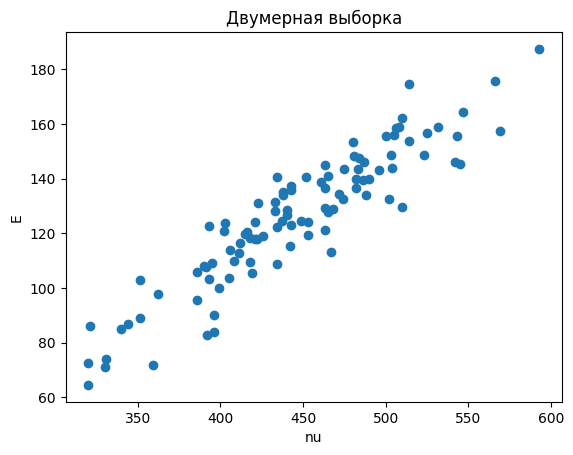

In [ ]:
plt.scatter(data['nu'], data['E'])
plt.xlabel('nu')
plt.ylabel('E')
plt.title('Двумерная выборка')
plt.show()

Для заданной выборки построим уравнения средней квадратичной регрессии $x$ на $y$ и $y$ на $x$ соответственно и построим полученные прямые на множестве выборки.

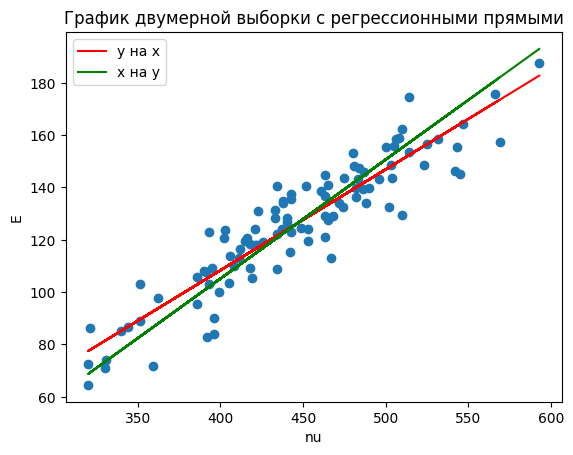

In [ ]:
y_on_x = np.polyfit(data['nu'], data['E'], 1)
x_on_y = np.polyfit(data['E'], data['nu'], 1)

plt.scatter(data['nu'], data['E'])
plt.xlabel('nu')
plt.ylabel('E')
plt.title('График двумерной выборки с регрессионными прямыми')

plt.plot(data['nu'], np.polyval(y_on_x, data['nu']), color='red', label='y на x')
y_values = (data['nu'] - x_on_y[1]) / x_on_y[0]
plt.plot(data['nu'], y_values, color='green', label='x на y')

plt.legend()
plt.show()

Выводы: полученные регрессионные прямые $y$ на $x$ и $x$ на $y$ построены с использованием метода наименьших квадратов (МНК), что обеспечивает минимальную сумму квадратов отклонений точек данных от этих линий. Прямая $y$ на $x$ минимизирует вертикальные отклонения точек от линии, а прямая $x$ на $y$ горизонтальные отклонения. Обе прямые пересекаются в точке, координаты которой соответствуют средним значениям выборок. Это указывает на то, что средние значения $x$ и $y$ являются центром распределения данных. Прямые близки друг к другу, что свидетельствует о сильной линейной зависимости между переменными $x$ и $y$, угол между ними небольшой, что свидетельствует о сильной корреляции.

Составим корреляционную таблицу для нахождения выборочного корреляционного отношения.

In [ ]:
intervals_nu[-1] += 0.001
intervals_E[-1] += 0.001

df_int = data.copy()

df_int['X'] = pd.cut(df_int['nu'], bins=intervals_nu, right=False, labels=bin_mid_nu)
df_int['Y'] = pd.cut(df_int['E'], bins=intervals_E, right=False, labels=bin_mid_E)

two_table = df_int.groupby(['Y', 'X'], observed=False).size().unstack(fill_value=0)

In [ ]:
corr_table = two_table.to_numpy()

X_k = len(bin_mid_nu)
Y_k = len(bin_mid_E)

n_x_j = [sum(corr_table[:, i]) for i in range(Y_k)]
n_y_i = [sum(corr_table[i]) for i in range(X_k)]

y_x_j = [np.average(bin_mid_E, weights=corr_table[:, i]) for i in range(Y_k)]
x_y_i = np.array([np.average(bin_mid_nu, weights=corr_table[i]) for i in range(X_k)])

# print("n_x_j:", n_x_j, sum(n_x_j))
# print("n_y_i:", n_y_i, sum(n_y_i))
# print("y_x_j:", y_x_j)
# print("x_y_i:", x_y_i)
# print("\n")

# def rnd(value, decimals=2):
#     return round(value, decimals)

# for i in range(Y_k):
#     print(rnd(bin_mid_E[i]), end =' | ')
#     print('', *corr_table[i], '', end=' | ')
#     print()

Оформим вычисления в таблицу:

Таблица 1

|       $ Y $       	|       	|       	|        	|  $ X $ 	|        	|        	|        	|             	|                   	|
|:------------------:|:------:|:------:|:-------:|:-------:|:-------:|:-------:|:-------:|:------------:|:------------------:|
|                   	| 339.5 	| 378.5 	|  417.5 	|  456.5 	|  495.5 	|  534.5 	|  573.5 	| $ n_{y_i} $ 	| $ \bar{x_{y_i}} $ 	|
|       73.28       	|   4   	|   1   	|    0   	|    0   	|    0   	|    0   	|    0   	|      5      	|       347.30      	|
|       90.84       	|   4   	|   5   	|    0   	|    0   	|    0   	|    0   	|    0   	|      9      	|       361.17      	|
|       108.39      	|   1   	|   5   	|    9   	|    2   	|    0   	|    0   	|    0   	|      17     	|       406.03      	|
|       125.95      	|   0   	|   1   	|   13   	|   14   	|    3   	|    0   	|    0   	|      31     	|       441.40      	|
|       143.51      	|   0   	|   0   	|    1   	|    9   	|   11   	|    3   	|    0   	|      24     	|       482.50      	|
|       161.06      	|   0   	|   0   	|    0   	|    0   	|    7   	|    4   	|    1   	|      12     	|       515.00      	|
|       178.62      	|   0   	|   0   	|    0   	|    0   	|    1   	|    0   	|    2   	|      3      	|       547.50      	|
|    $ n_{x_j} $    	|   9   	|   12  	|   23   	|   25   	|   22   	|    7   	|    3   	|     101     	|         -         	|
| $ \bar{y_{x_j}} $ 	| 84.98 	| 99.61 	| 119.84 	| 130.87 	| 148.30 	| 153.54 	| 172.77 	|      -      	|         -         	|

Убедимся, что неравенства $ η_{xy} ⩾ |r_{xy}| $ и $ η_{yx} ⩾ |r_{xy}| $ выполняются.

In [ ]:
D_intergroup_X = np.sum(n_x_j * (x_y_i - s_2_nu) ** 2) / len(data['nu'])
D_general_X = np.mean((x_avg_b_nu - s_2_nu) ** 2)
eta_xy = np.sqrt(D_intergroup_X / D_general_X)

D_intergroup_Y = np.sum(n_y_i * (y_x_j - s_2_E) ** 2) / len(data['E'])
D_general_Y = np.mean((x_avg_b_E - s_2_E) ** 2)
eta_yx = np.sqrt(D_intergroup_Y / D_general_Y)

print((eta_xy,"⩾", r_xy))
print((eta_yx,"⩾", r_xy))

(1.0045186150322711, '⩾', 0.8788242550092751)
(0.9907013361296495, '⩾', 0.8788242550092751)


Для заданной выборки построим корреляционную кривую параболического вида $ y = β_0 + β_1 x + β_2 x^2 $

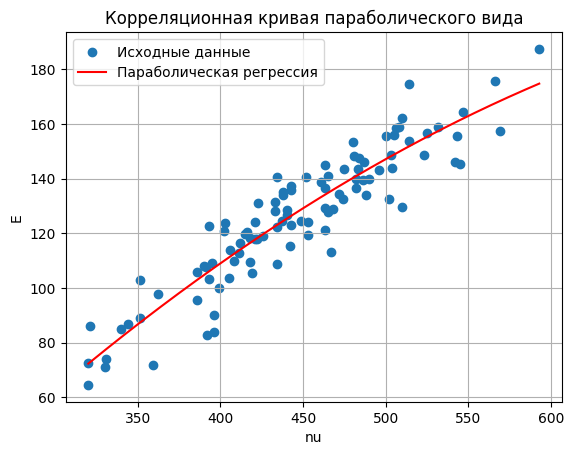

In [ ]:
from sklearn.metrics import r2_score

x = data['nu'].values
y = data['E'].values

coefficients = np.polyfit(x, y, 2)
poly_func = np.poly1d(coefficients)

plt.scatter(x, y, label='Исходные данные')
x_fit = np.linspace(min(x), max(x), 500)
plt.plot(x_fit, poly_func(x_fit), 'r', label='Параболическая регрессия')

plt.xlabel('nu')
plt.ylabel('E')
plt.title('Корреляционная кривая параболического вида')
plt.legend()
plt.grid(True)
plt.show()

Выводы: на графике параболическая кривая почти не отклоняется от прямой линии, что указывает на преобладание линейного характера зависимости. Влияние квадратичного члена на модель незначительно, и основная зависимость может быть описана линейной функцией.

Для заданной выборки построим корреляционную кривую в зависимости от номера варианта.

4 вариант = d логарифмическая функция $ y = β_0 + β_1 ln x $

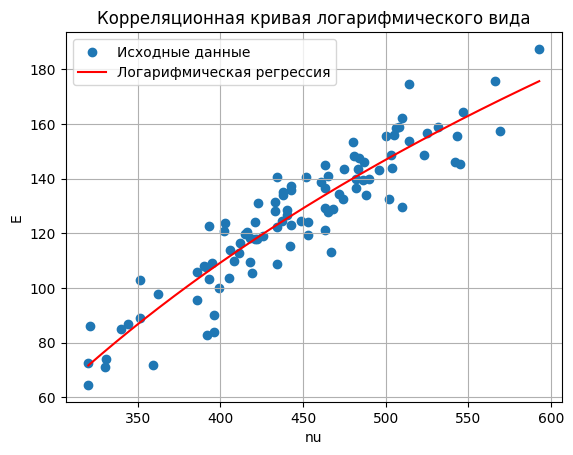

In [ ]:
from scipy.optimize import curve_fit

x = data['nu'].values
y = data['E'].values

def log_func(x, beta0, beta1):
    return beta0 + beta1 * np.log(x)

params, _ = curve_fit(log_func, x, y)

plt.scatter(x, y, label='Исходные данные')
x_fit = np.linspace(min(x), max(x), 500)
plt.plot(x_fit, log_func(x_fit, *params), 'r', label='Логарифмическая регрессия')

plt.xlabel('nu')
plt.ylabel('E')
plt.title('Корреляционная кривая логарифмического вида')
plt.legend()
plt.grid(True)
plt.show()

Выводы: на графике логарифмическая кривая почти не отклоняется от прямой линии, что указывает на преобладание линейного характера зависимости. Влияние логарифмического члена на модель незначительно, и основная зависимость может быть описана линейной функцией.

## Выводы

В ходе выполнения практической работы были изучены основные принципы метода наименьших квадратов (МНК), включая его статистические свойства, роль в регрессионном анализе и понятие функции регрессии. Также рассмотрено корреляционное отношение как мера тесноты связи, которая может быть как линейной, так и нелинейной.

Для анализа зависимости между переменными $x$ и $y$ были построены графики двумерной выборки, уравнения линейной регрессии xx на $y$ и $y$ на $x$, а также корреляционные кривые параболического и логарифмического видов. Результаты анализа показали, что связь между переменными $x$ и $y$ имеет преимущественно линейный характер. Это подтверждается тем, что как параболическая, так и логарифмическая модели не показали значительного улучшения в описании данных по сравнению с линейной моделью. Влияние квадратичного и логарифмического членов на модель оказалось незначительным, что позволяет сделать вывод о возможности использования более простой линейной модели для описания зависимости.

Таким образом, метод наименьших квадратов успешно применен для анализа данных, а линейная модель оказалась достаточной для описания связи между переменными $x$ и $y$.